## PROJECT 2: Customer Experience at an investment management company

### Day 1 (Week 5) : Dataset discovery, cleaning and fix

| Category                        | Key Indicators                | Description
| ------------------------------- | ----------------------------- | ----------------------------------------------------------------
| 🔹 **Global performance**       | **Completion Rate**           | % of users who has reached the confirmation page (after step 3) (Hypothesis 1)
| 🔹 **Process efficiency**       | **Average Time per Step**     | Average time spent at each step  (Hypothesis 2)
| 🔹 **Focus**                    | **Error Rate**                | % of users who went back during processing steps : result -->  error(Hypothesis 3)
| 🔹 **Engagment**                | **Drop-off Rate**             | % of users who has abandoned at a specific step (Hypothesis 4 if we have time)
| 🔹 **User behavior**            | **Number of Steps Completed** | Number of steps completed (Optionnal)
| 🔹 **A/B comparison**           | **Difference in conversion**  | Average difference of completion between groups (Test - Controle) (Optionnal)


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

#### Loading and reading the datasets

In [2]:
csv_path_1 = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/df_final_demo.csv'
csv_path_2 = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/df_final_experiment_clients.csv'
csv_path_3 = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/df_final_web_data_pt_1.csv'
csv_path_4 = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/df_final_web_data_pt_2.csv'

df1 = pd.read_csv(csv_path_1)
df2 = pd.read_csv(csv_path_2)
df3 = pd.read_csv(csv_path_3)
df4 = pd.read_csv(csv_path_4)

#### Display the first few rows of the dataframes

In [3]:
display(df1.head())
display(df2.head())
display(df3.head())
display(df4.head())

,client_id;clnt_tenure_yr;clnt_tenure_mnth;clnt_age;gendr;num_accts;bal;calls_6_mnth;logons_6_mnth
0,836976;6.0;73.0;60.5;U;2.0;45105.3;6.0;9.0
1,2304905;7.0;94.0;58.0;U;2.0;110860.3;6.0;9.0
2,1439522;5.0;64.0;32.0;U;2.0;52467.78999999999;...
3,1562045;16.0;198.0;49.0;M;2.0;67454.65;3.0;6.0
4,5126305;12.0;145.0;33.0;F;2.0;103671.75;0.0;3.0


,client_id;Variation
0,9988021;Test
1,8320017;Test
2,4033851;Control
3,1982004;Test
4,9294070;Control


,client_id;visitor_id;visit_id;process_step;date_time
0,9988021;580560515_7732621733;781255054_2193545...
1,9988021;580560515_7732621733;781255054_2193545...
2,9988021;580560515_7732621733;781255054_2193545...
3,9988021;580560515_7732621733;781255054_2193545...
4,9988021;580560515_7732621733;781255054_2193545...


,client_id;visitor_id;visit_id;process_step;date_time
0,763412;601952081_10457207388;397475557_4044094...
1,6019349;442094451_91531546617;154620534_353310...
2,6019349;442094451_91531546617;154620534_353310...
3,6019349;442094451_91531546617;154620534_353310...
4,6019349;442094451_91531546617;154620534_353310...


#### Fixing the data by splitting the combined columns into separate columns

In [4]:
# For df1
# -----------------------------------
# Identify the column with combined data
col1 = df1.columns[0]
df1[['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']] = df1[col1].str.split(';', expand=True)

# Drop the original combined column
df1 = df1.drop(columns=[col1])

# Show result
display(df1.head())

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.78999999999,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
# For df2
# -----------------------------------
# Identify the column with combined data
col2 = df2.columns[0]
df2[['client_id', 'Variation']] = df2[col2].str.split(';', expand=True)

# Drop the original combined column
df2 = df2.drop(columns=[col2])

# Show result
display(df2.head())

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [6]:
# For df3
# -----------------------------------
# Identify the column with combined data
col3 = df3.columns[0]
df3[['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']] = df3[col3].str.split(';', expand=True)

# Drop the original combined column
df3 = df3.drop(columns=[col3])

# Show result
display(df3.head())

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [7]:
# For df4
# -----------------------------------
# Identify the column with combined data
col4 = df4.columns[0]
df4[['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']] = df4[col4].str.split(';', expand=True)

# Drop the original combined column
df4 = df4.drop(columns=[col4])

# Show result
display(df4.head())

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


#### Combining datasets

In [8]:
# Merging df1 and df2 on 'client_id'
df_client_infos = pd.merge(df1, df2, on='client_id')
display(df_client_infos.head())
df_client_infos.shape

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.78999999999,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


(70609, 10)

In [9]:
# Concatenation of df3 and df4 on 'client_id'
df_client_web = pd.concat([df3, df4], ignore_index=True)
display(df_client_web.head())
df_client_web.shape

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


(755405, 5)

#### Data cleaning and standardization

In [10]:
# For df_client_infos
# -----------------------------------
# Converting columns to numeric type, handling errors
df_client_infos['clnt_tenure_yr'] = pd.to_numeric(df_client_infos['clnt_tenure_yr'], errors='coerce')
df_client_infos['clnt_tenure_mnth'] = pd.to_numeric(df_client_infos['clnt_tenure_mnth'], errors='coerce')
df_client_infos['clnt_age'] = pd.to_numeric(df_client_infos['clnt_age'], errors='coerce')
df_client_infos['num_accts'] = pd.to_numeric(df_client_infos['num_accts'], errors='coerce')
df_client_infos['bal'] = pd.to_numeric(df_client_infos['bal'], errors='coerce')
df_client_infos['calls_6_mnth'] = pd.to_numeric(df_client_infos['calls_6_mnth'], errors='coerce')
df_client_infos['logons_6_mnth'] = pd.to_numeric(df_client_infos['logons_6_mnth'], errors='coerce')

# Converting data types to integer where appropriate
df_client_infos['clnt_tenure_yr'] = df_client_infos['clnt_tenure_yr'].astype('Int64')
df_client_infos['clnt_tenure_mnth'] = df_client_infos['clnt_tenure_mnth'].astype('Int64')
df_client_infos['num_accts'] = df_client_infos['num_accts'].astype('Int64')
df_client_infos['calls_6_mnth'] = df_client_infos['calls_6_mnth'].astype('Int64')
df_client_infos['logons_6_mnth'] = df_client_infos['logons_6_mnth'].astype('Int64')

# Truncating 'bal' into 2 decimals
df_client_infos['bal'] = df_client_infos['bal'].round(2)

# Checking data types and first few rows after conversion
df_client_infos.dtypes

# Checking for missing values
missing_values = df_client_infos.isnull().sum()
print("\n Missing values in each column:\n", missing_values)

# Drop rows with missing values
df_client_infos = df_client_infos.dropna()
missing_values_after_dropping = df_client_infos.isnull().sum()  # Confirm no missing values remain
print("\nMissing values after dropping rows with NaN:\n", missing_values_after_dropping)

# Standardizing column names to lowercase and replacing spaces with underscores
df_client_infos.columns = df_client_infos.columns.str.lower().str.replace(' ', '_')

# Renaming specific columns for clarity
df_client_infos = df_client_infos.rename(columns={'gendr': 'gender', 
                                                  'bal': 'balance', 
                                                  'variation': 'group_variation', 
                                                  'clnt_age': 'client_age', 
                                                  'num_accts': 'number_of_accounts', 
                                                  'calls_6_mnth': 'calls_last_6_months', 
                                                  'logons_6_mnth': 'logons_last_6_months', 
                                                  'clnt_tenure_yr': 'client_tenure_years', 
                                                  'clnt_tenure_mnth': 'client_tenure_months'})

# Droping clients who doesn't participate in the experiment
df_client_infos = df_client_infos[df_client_infos['group_variation'].isin(['Test', 'Control'])]

# Droping 'X' gender values
df_client_infos = df_client_infos[df_client_infos['gender'].isin(['M', 'F', 'U'])]

df_client_infos.head()



 Missing values in each column:
 client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr                0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
Variation            0
dtype: int64

Missing values after dropping rows with NaN:
 client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
dtype: int64


,client_id,client_tenure_years,client_tenure_months,client_age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months,group_variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control


In [11]:
# For df_client_web
# -----------------------------------
# Converting 'date_time' to datetime format
df_client_web['date_time'] = pd.to_datetime(df_client_web['date_time'], errors='coerce')

# We want to inner join the variation column from df_client_infos to df_client_web
df_client_web = pd.merge(df_client_web, df_client_infos[['client_id', 'group_variation']], on='client_id', how='inner')

# Checking data types
df_client_web.dtypes


client_id                  object
visitor_id                 object
visit_id                   object
process_step               object
date_time          datetime64[ns]
group_variation            object
dtype: object

###  Quick Demographics Analysis

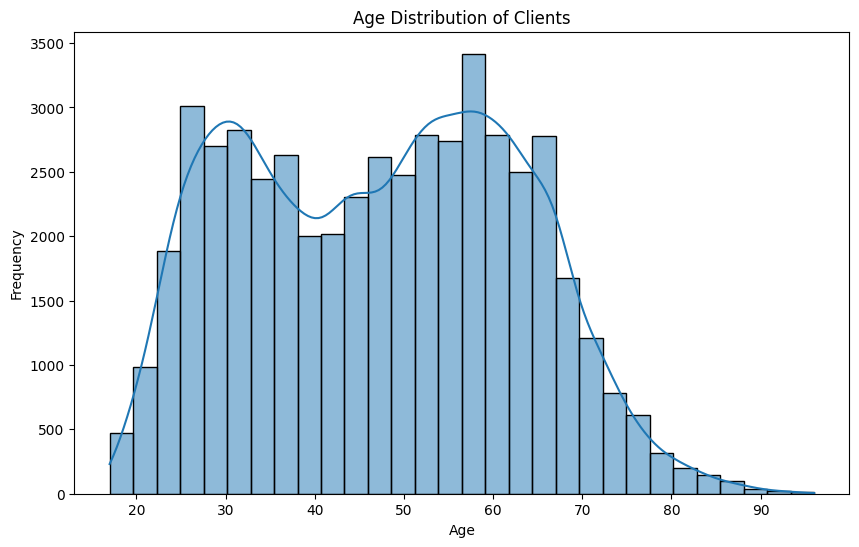


 Age Statistics:
 count    50485.000000
mean        47.320362
std         15.518599
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: client_age, dtype: float64

The age distribution shows a concentration of clients in the 30-50 age range, indicating that middle-aged individuals are the primary users of the online process. 
There are fewer clients in the younger and older age brackets.


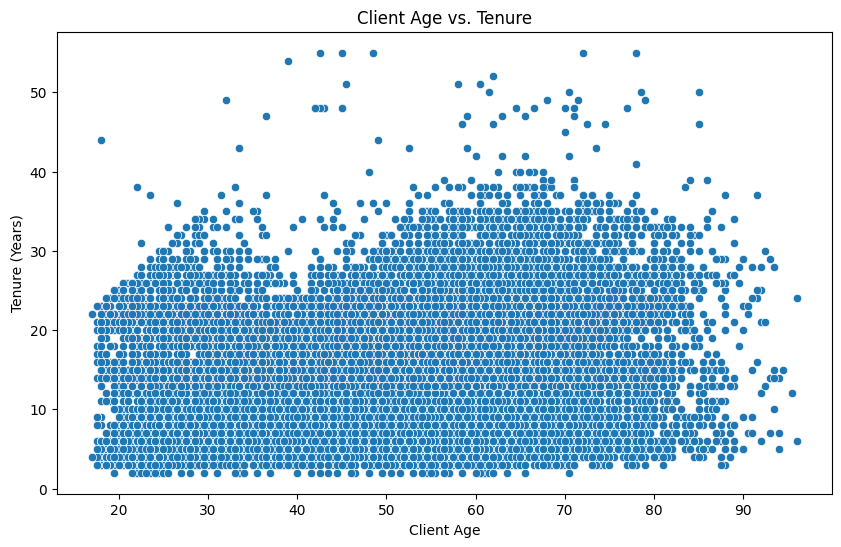


Correlation between Age and Tenure:
                      client_age  client_tenure_years
client_age             1.000000             0.311192
client_tenure_years    0.311192             1.000000

The scatter plot indicates a slight positive correlation between age and tenure, suggesting that older clients tend to have longer tenures. 
However, there are also younger clients with significant tenures, indicating a diverse client base in terms of age and loyalty.


In [12]:
# Who are the primary clients using this online process?

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_client_infos['client_age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print("\n Age Statistics:\n", df_client_infos['client_age'].describe())

# Insights about age distribution
print("""\nThe age distribution shows a concentration of clients in the 30-50 age range, indicating that middle-aged individuals are the primary users of the online process. 
There are fewer clients in the younger and older age brackets.""")

# Are the primary clients younger or older, new or long-standing?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='client_age', y='client_tenure_years', data=df_client_infos)
plt.title('Client Age vs. Tenure')
plt.xlabel('Client Age')
plt.ylabel('Tenure (Years)')
plt.show()
print("\nCorrelation between Age and Tenure:\n", df_client_infos[['client_age', 'client_tenure_years']].corr())

# Insights about age and tenure
print("""\nThe scatter plot indicates a slight positive correlation between age and tenure, suggesting that older clients tend to have longer tenures. 
However, there are also younger clients with significant tenures, indicating a diverse client base in terms of age and loyalty.""")

In [13]:
df_client_infos.head()

,client_id,client_tenure_years,client_tenure_months,client_age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months,group_variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control


In [14]:
display(df_client_web)

,client_id,visitor_id,visit_id,process_step,date_time,group_variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321182,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321183,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321184,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321185,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


### Hypothesis Testing

#### Completion Rate Hypothesis Testing

	Hypothesis :

Does the new design (test group) increase the completion rate of the process flow ? <br><br>

	Statistical Formulation :

\begin{aligned}
H_0 (null) &: p_{\text{test}} ≈ p_{\text{control}} \\
&\text{→ There is no significant difference in completion rate between both groups.} \\
\\
H_1 (alternative) &: p_{\text{test}} ≠ p_{\text{control}} \\
&\text{→ The Test Group has a different completion rate (ideally higher) than the Control Group.}
\end{aligned}

	Test :
Since we only compare proportion between Test group and Controle group, can use a One-tailed proportion test (Z-test) or Chi-square test of independence. <br><br>

	Interpretation :
If the p-value $<$ 0.05 :<br>
→ reject $H_0$<br>
→ the new design increase completion rate significativly

Else :<br>
→ No significative impact on completion rate.


In [15]:
# Creating a new column to indicate if a client completed the process
df_client_web['process_completed'] = df_client_web['process_step'].apply(lambda x: 1 if x == 'confirm' else 0)

# Aggregating to find the maximum step reached by each client (indicating completion status)
completion_per_user = df_client_web.groupby(['client_id', 'group_variation'])['process_completed'].max().reset_index()

# Calculating completion rates by group_variation
completion_summary = (
    completion_per_user
    .groupby('group_variation')['process_completed']
    .mean()
    .reset_index()
    .round(3)
)
completion_summary = completion_summary.rename(columns={'process_completed': 'completion_rate'})
completion_summary['completion_rate_percentage'] = (completion_summary['completion_rate'] * 100).round(3)

display(completion_per_user)
display(completion_summary)

,client_id,group_variation,process_completed
0,1000062,Control,1
1,1000353,Control,1
2,1000536,Control,1
3,1000672,Control,1
4,1001101,Test,1
...,...,...,...
50480,9999150,Test,0
50481,9999400,Test,1
50482,9999626,Test,0
50483,9999729,Test,1


,group_variation,completion_rate,completion_rate_percentage
0,Control,0.656,65.6
1,Test,0.693,69.3


In [16]:
# Chi-square test of independence for completion rates between Test and Control groups
contingency_table = pd.crosstab(completion_per_user['group_variation'], completion_per_user['process_completed'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2}, p-value: {p_value}")

# Hypothesis testing conclusion
# Significance level : 5%
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The new design significantly increases the completion rate.")
else:
    print("Fail to reject H0: No significant impact detected on completion rate.")

print ("\n The new design appears to have a positive effect (approximatively 4% increase) on the completion rate of the online process.")

Chi-square Statistic: 79.13103962442536, p-value: 5.812391548282766e-19
Reject H0: The new design significantly increases the completion rate.

 The new design appears to have a positive effect (approximatively 4% increase) on the completion rate of the online process.


/var/folders/5l/d76xm4td69x828mtm3bkbxhh0000gn/T/ipykernel_58196/164511509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group_variation', y='completion_rate_percentage', data=completion_summary, palette=['orange', 'blue'])


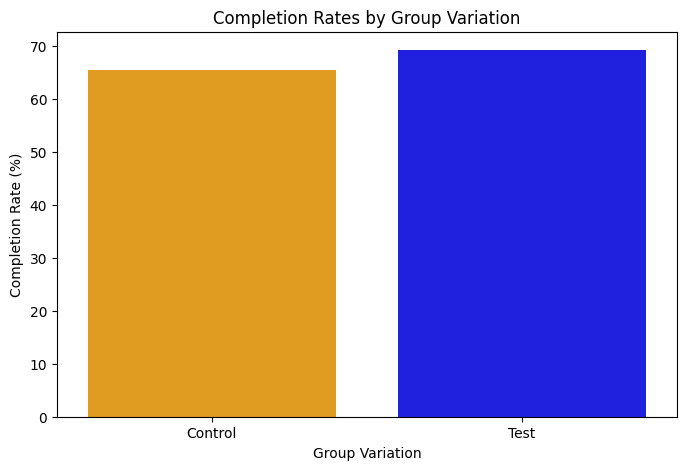

In [17]:
# Visualizing completion rates
plt.figure(figsize=(8, 5))
sns.barplot(x='group_variation', y='completion_rate_percentage', data=completion_summary, palette=['orange', 'blue'])
plt.title('Completion Rates by Group Variation')
plt.xlabel('Group Variation')
plt.ylabel('Completion Rate (%)')
plt.show()

In [18]:
# # Exporting the completion summary to CSV
# completion_summary_csv_path = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/completion_summary.csv'
# completion_summary.to_csv(completion_summary_csv_path, index=False)

# completion_per_user_csv_path = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/completion_per_user.csv'
# completion_per_user.to_csv(completion_per_user_csv_path, index=False)

#### Time Hypothesis Testing

	Hypothesis :

Does the new design (test group) increase the completion rate of the process flow ? <br><br>

	Statistical Formulation :

\begin{aligned}
H_0 (null) &: μ_{\text{test}} ≈ μ_{\text{control}} \\
&\text{→ The average time per step is very similar between both groups.} \\
\\
H_1 (alternative) &: μ_{\text{test}} < μ_{\text{control}} \\
&\text{→ Users from the Test group spend less time per step on average.}
\end{aligned}

	Test :
In order to compare the average between two independant groups, we can use a T-test. <br><br>

	Conditions :

- Data must be numerical (seconds/minutes).
- Groups must be independant. <br><br>

	Interpretation :

If the p-value $<$ 0.05 :<br>
→ reject $H_0$<br>
→ the new design allow users to complete steps faster.

If the p-value $>$ 0.05 :<br>
   → No significative improvment of the average time.

In [19]:
# We want to create a new column indicating the step time duration for each client
time_duration = df_client_web.sort_values(by=['client_id', 'visit_id', 'date_time'])

time_duration['step_duration'] = (
    time_duration.groupby(['client_id', 'visit_id'])['date_time']
    .diff()
    .dt.total_seconds()
)

# Eliminate NaN values (Start of process)
time_duration = time_duration[time_duration['step_duration'].notnull()]

# Eliminate negative values (Errors/Anomalies)
time_duration = time_duration[time_duration['step_duration'] >= 0]

display(time_duration)

# Hypothesis Testing for Average Time to Complete Steps
avg_time = time_duration.groupby(['group_variation', 'client_id'])['step_duration'].mean().reset_index()

# We want to pivot the table for better visualization
avg_time = (
    avg_time
    .pivot(index='client_id', columns='group_variation', values='step_duration')
    .reset_index()
    .round(2)
)

display(avg_time)

,client_id,visitor_id,visit_id,process_step,date_time,group_variation,process_completed,step_duration
88608,1000062,20083890_82531534775,68804396_74737424429_397490,step_1,2017-04-06 15:41:51,Control,0,182.0
88607,1000062,20083890_82531534775,68804396_74737424429_397490,step_2,2017-04-06 15:42:01,Control,0,10.0
88606,1000062,20083890_82531534775,68804396_74737424429_397490,step_3,2017-04-06 15:42:50,Control,0,49.0
88604,1000062,20083890_82531534775,68804396_74737424429_397490,confirm,2017-04-06 15:54:49,Control,1,719.0
313605,1000353,718125296_26494005902,25815056_49382962398_993535,start,2017-06-05 16:51:19,Control,0,42.0
...,...,...,...,...,...,...,...,...
276068,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,0,10.0
276067,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,0,39.0
276066,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,1,21.0
105310,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,Test,0,15.0


group_variation,client_id,Control,Test
0,1000062,240.00,NaN
1,1000353,61.67,NaN
2,1000536,22.60,NaN
3,1000672,34.75,NaN
4,1001101,NaN,56.91
...,...,...,...
46787,9999150,NaN,9.00
46788,9999400,NaN,29.75
46789,9999626,NaN,8.00
46790,9999729,NaN,67.50


In [20]:
# T-test for step duration between Test and Control groups

test_times = time_duration[time_duration['group_variation'] == 'Test']['step_duration']
control_times = time_duration[time_duration['group_variation'] == 'Control']['step_duration']

stat, pval = ttest_ind(test_times, control_times, equal_var=False, alternative='less')
print(f"T-statistic: {stat:.2f}, p-value: {pval:.2f}")

# Hypothesis testing conclusion
# Significance level : 5%
alpha = 0.05
if pval < alpha:
    print("Reject H0: The new design significantly reduces the time to complete steps.")
else:
    print("Fail to reject H0: No significant impact detected on time to complete steps.")

T-statistic: 2.46, p-value: 0.99
Fail to reject H0: No significant impact detected on time to complete steps.


/var/folders/5l/d76xm4td69x828mtm3bkbxhh0000gn/T/ipykernel_58196/1364067331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group_variation', y='step_duration', data=filtered_time_duration, palette=['orange', 'blue'])


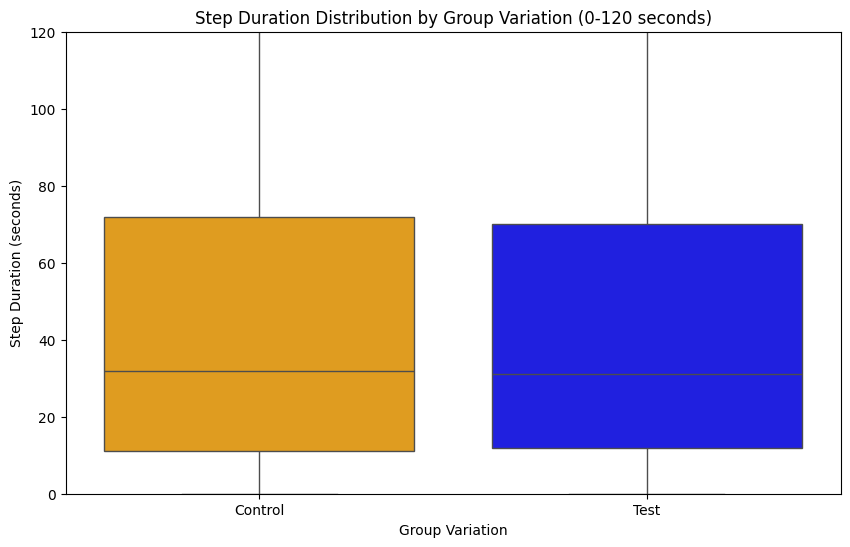

In [21]:
# Visualizing average time distribution for Test and Control groups
# Removing extreme outliers for better visualization
filtered_time_duration = time_duration[time_duration['step_duration'] <= time_duration['step_duration'].quantile(0.95)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='group_variation', y='step_duration', data=filtered_time_duration, palette=['orange', 'blue'])
plt.ylim(0, 120)  # Adjust y-axis limits to focus on the main distribution
plt.title('Step Duration Distribution by Group Variation (0-120 seconds)')
plt.xlabel('Group Variation')
plt.ylabel('Step Duration (seconds)')
plt.show()


In [22]:
# # Exporting the time duration to CSV
# time_duration_csv_path = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/time_duration.csv'
# time_duration.to_csv(time_duration_csv_path, index=False)

# avg_time_csv_path = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/avg_time.csv'
# avg_time.to_csv(avg_time_csv_path, index=False)


#### Error Rate Hypothesis Testing

An error is defined here as a backward movement in the process (e.g., the user goes back to the previous step).<br><br>

    Hypothesis :

Does the new design reduce the frequency of user errors (backward steps) in the process flow? <br><br>

    Statistical Formulation :

\begin{aligned}
H_0 (null) &: p_{\text{test}} ≈ p_{\text{control}} \\
&\text{→ There is no significant difference in average errore rate between both groups.} \\
\\
H_1 (alternative) &: p_{\text{test}} ≠ p_{\text{control}} \\
&\text{→ The Test Group has a different error rate (ideally lower) than the Controle Group.}
\end{aligned}

    Test :
It is a binary categorical variable (Error : Yes / No), so we can use a One-tailed proportion test (Z-test) or Chi-square test of independence, to compare error proportion between both groups. <br><br>

    Interpretation :
If the p-value $<$ 0.05 :<br>
→ reject $H_0$<br>
→ the new design is more intuitive and leads to fewer user errors<br>
Else :<br>
→ No significative difference on error rate between both groups.




In [23]:
# We want to create two new columns in df_client_web: step_encoded
step_mapping = {
    'start': 0,
    'step_1': 1,
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}
df_client_web['step_encoded'] = df_client_web['process_step'].map(step_mapping)
df_client_web = df_client_web.sort_values(by=['client_id', 'date_time'])

# Now we want to verify if the steps are in order for each client, if not then it's considered an error
# To do this, we want to use the diff method and check if the difference between consecutive steps is always 1 or 0 (for repeated steps)

# Calculating the difference between consecutive steps for each client
df_client_web['step_diff'] = df_client_web.groupby('client_id')['step_encoded'].diff()

# 'error_detected' column creation
# Error = step back in process (diff < 0)
df_client_web['error_detected'] = df_client_web['step_diff'] < 0

# Replace NaN (first rows of each client) with False
df_client_web['error_detected'] = df_client_web['error_detected'].fillna(False)

# Now we want to see the error detected column by client_id and group_variation
# If a client has at least one error, we consider that client as having an error
df_client_error = df_client_web.groupby(['client_id', 'group_variation'])['error_detected'].any().reset_index()
df_client_error = df_client_error.rename(columns={'error_detected': 'client_error'})
display(df_client_error)

# Now we want to create a summary table showing error rate by group_variation
error_summary = (
    df_client_error
    .groupby('group_variation')['client_error']
    .mean()
    .reset_index()
    .round(3)
)
error_summary = error_summary.rename(columns={'client_error': 'error_rate'})

error_summary['error_rate_percentage'] = (error_summary['error_rate'] * 100).round(3)

display(error_summary)

,client_id,group_variation,client_error
0,1000062,Control,False
1,1000353,Control,False
2,1000536,Control,True
3,1000672,Control,False
4,1001101,Test,True
...,...,...,...
50480,9999150,Test,True
50481,9999400,Test,False
50482,9999626,Test,False
50483,9999729,Test,True


,group_variation,error_rate,error_rate_percentage
0,Control,0.344,34.4
1,Test,0.378,37.8


In [24]:
display(df_client_web)

,client_id,visitor_id,visit_id,process_step,date_time,group_variation,process_completed,step_encoded,step_diff,error_detected
88609,1000062,20083890_82531534775,68804396_74737424429_397490,start,2017-04-06 15:38:49,Control,0,0,NaN,False
88608,1000062,20083890_82531534775,68804396_74737424429_397490,step_1,2017-04-06 15:41:51,Control,0,1,1.0,False
88607,1000062,20083890_82531534775,68804396_74737424429_397490,step_2,2017-04-06 15:42:01,Control,0,2,1.0,False
88606,1000062,20083890_82531534775,68804396_74737424429_397490,step_3,2017-04-06 15:42:50,Control,0,3,1.0,False
88604,1000062,20083890_82531534775,68804396_74737424429_397490,confirm,2017-04-06 15:54:49,Control,1,4,1.0,False
...,...,...,...,...,...,...,...,...,...,...
276068,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,0,2,1.0,False
276067,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,0,3,1.0,False
276066,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,1,4,1.0,False
244898,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0,0,NaN,False


In [25]:
# Chi-square test of independence

# Create a contingency table
contingency_table = pd.crosstab(df_client_error['client_error'], df_client_error['group_variation'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2}, p-value: {p}")

# Hypothesis testing conclusion
# Significance level : 5%
alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in error rates between Test and Control groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in error rates between Test and Control groups.")

if error_summary.loc[error_summary['group_variation'] == 'Test', 'error_rate'].values[0] > error_summary.loc[error_summary['group_variation'] == 'Control', 'error_rate'].values[0]:
    print("The Test group has a higher error rate than the Control group.")
else:
    print("The Test group has a lower error rate than the Control group.")

Chi-square Statistic: 62.89329731372815, p-value: 2.1821355789076446e-15
Reject the null hypothesis: There is a significant difference in error rates between Test and Control groups.
The Test group has a higher error rate than the Control group.


/var/folders/5l/d76xm4td69x828mtm3bkbxhh0000gn/T/ipykernel_58196/2370447651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group_variation', y='error_rate_percentage', data=error_summary, palette=['orange', 'blue'])


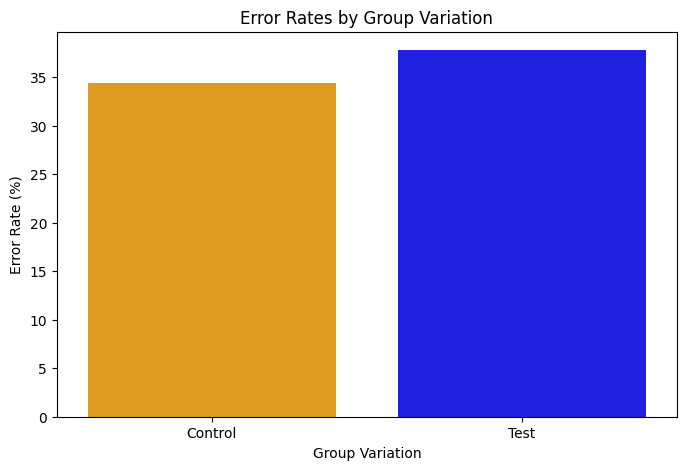

In [26]:
# Visualizing error rates
plt.figure(figsize=(8, 5))
sns.barplot(x='group_variation', y='error_rate_percentage', data=error_summary, palette=['orange', 'blue'])
plt.title('Error Rates by Group Variation')
plt.xlabel('Group Variation')
plt.ylabel('Error Rate (%)')
plt.show()

#### Drop-Off Rate Hypothesis Testing

A dropp-off is defined as an abandon in the process step at some point, and a user never reaching the confirmation page.<br><br>

    Hypothesis :

Does the new design reduce the drop-off rate during the process flow? <br><br>

    Statistical Formulation :

\begin{aligned}
H_0 (null) &: p_{\text{test}} ≈ p_{\text{control}} \\
&\text{→ There is no significant difference in drop-off between both groups on average.} \\
\\
H_1 (alternative) &: p_{\text{test}} ≠ p_{\text{control}} \\
&\text{→ The Test Group has a different drop-off rate (ideally lower) than the Controle Group.}
\end{aligned}

    Test :
We can use a One-tailed proportion test (Z-test) or Chi-square test of independence. <br><br>

    Interpretation :
If the p-value $<$ 0.05 :<br>
→ reject $H_0$<br>
→ the new design is more intuitive and leads to fewer user errors<br>
Else :<br>
→ No significative difference in drop-off rate between both groups.


In [27]:
# Hypothesis Testing for Drop-off Rate

# Taux d'abandon dérivé
completion_summary['drop_off_rate'] = 1 - completion_summary['completion_rate']
completion_summary['drop_off_rate_percentage'] = (completion_summary['drop_off_rate'] * 100).round(3)
display(completion_summary)



,group_variation,completion_rate,completion_rate_percentage,drop_off_rate,drop_off_rate_percentage
0,Control,0.656,65.6,0.344,34.4
1,Test,0.693,69.3,0.307,30.7


In [28]:
# Hypothesis Testing for Drop-off Rate
# Chi-square test of independence for drop-off rates between Test and Control groups
contingency_table = pd.crosstab(completion_per_user['group_variation'], 1 - completion_per_user['process_completed'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2}, p-value: {p_value}")

# Hypothesis testing conclusion
# Significance level : 5%
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The new design significantly reduces the drop-off rate.")
else:
    print("Fail to reject H0: No significant impact detected on drop-off rate.")


Chi-square Statistic: 79.13103962442536, p-value: 5.812391548282766e-19
Reject H0: The new design significantly reduces the drop-off rate.


/var/folders/5l/d76xm4td69x828mtm3bkbxhh0000gn/T/ipykernel_58196/2302337258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group_variation', y='drop_off_rate_percentage', data=completion_summary, palette=['orange', 'blue'])


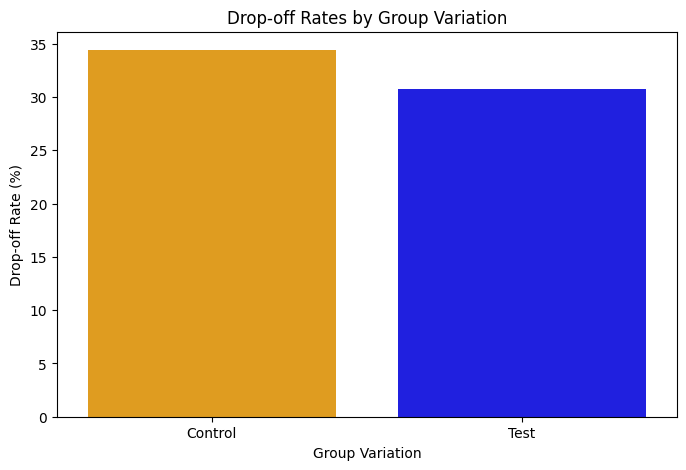

In [29]:
# Visualizing drop-off rates
plt.figure(figsize=(8, 5))
sns.barplot(x='group_variation', y='drop_off_rate_percentage', data=completion_summary, palette=['orange', 'blue'])
plt.title('Drop-off Rates by Group Variation')
plt.xlabel('Group Variation')
plt.ylabel('Drop-off Rate (%)')
plt.show()

### Assumptions & Conclusions

In [30]:
print("""Based on our 4 hypothesis tests, we can conclude that the new design has a positive impact on the online process by increasing the completion rate and reducing the drop-off rate. 
However, it does not significantly reduce the time taken to complete the steps or the error rate during the process.
Also, 4% increase in completion rate is not a negligible improvement, but does not meet the initial expectations set for this project which aimed for a 5% increase.""")

Based on our 4 hypothesis tests, we can conclude that the new design has a positive impact on the online process by increasing the completion rate and reducing the drop-off rate. 
However, it does not significantly reduce the time taken to complete the steps or the error rate during the process.
Also, 4% increase in completion rate is not a negligible improvement, but does not meet the initial expectations set for this project which aimed for a 5% increase.


#### Saving new cleaned dataframes to CSV files

In [31]:
# Now we want to add the new columns to df_client_web for further analysis
df_client_web = pd.merge(df_client_web, df_client_error[['client_id', 'client_error']], on='client_id', how='left')
df_client_web = pd.merge(df_client_web, time_duration[['client_id', 'process_step', 'step_duration']], on=['client_id', 'process_step'], how='left')

In [ ]:
# Saving the cleaned client infos dataframe to a new CSV file

# For df_client_infos
# -----------------------------------
cleaned_csv_path = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/df_client_infos_cleaned.csv'
df_client_infos.to_csv(cleaned_csv_path, index=False)

# For df_client_web
# -----------------------------------
cleaned_web_csv_path = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/df_client_web_cleaned.csv'
df_client_web.to_csv(cleaned_web_csv_path, index=False)

In [33]:
# We want to build a funnel chart in Tableau to visualize the drop-off at each step of the online process for both Test and Control groups.
# To do this, we need to create a summary dataframe with max step_encoded by unique clients for both groups.
funnel_data = df_client_web.groupby(['group_variation', 'client_id'])['step_encoded'].max().reset_index()
funnel_data = funnel_data.rename(columns={'step_encoded': 'max_step_reached'})

In [ ]:
# Exporting the funnel data to CSV
funnel_data_csv_path = '/Users/snow/Documents/IRON HACK COURSE/Week 5/Mini Project/CSV Data Files/funnel_data.csv'
funnel_data.to_csv(funnel_data_csv_path, index=False)